In [3]:
import pandas as pd
import seaborn as sns

### Initial formatting and parsing

In [5]:
df = pd.read_excel("ACDC_Component_Cracks_2022.03.03-04(16).xlsx")

In [6]:
df.head()

,signalId,signalName,date,physicalSignalValue
0,132706,FA_Hoehenwert_HL_00,20220303,-40.0
1,132706,FA_Hoehenwert_HL_00,20220303,-50.0
2,132706,FA_Hoehenwert_HL_00,20220303,-60.0
3,132706,FA_Hoehenwert_HL_00,20220303,-30.0
4,132706,FA_Hoehenwert_HL_00,20220303,-10.0


In [7]:
df.signalName.unique()

array(['FA_Hoehenwert_HL_00', 'FA_BodyAcceleration_HL', 'ESP_v_Signal',
       'FA_BodyAcceleration_VL', 'FA_BodyAcceleration_VR',
       'FA_Hoehenwert_VL_00', 'FA_BodyAcceleration_HR',
       'FA_Hoehenwert_VR_00', 'FA_Hoehenwert_HR_00'], dtype=object)

In [8]:
dfESP = df[df.signalName == "ESP_v_Signal"]
dfFA = df[df.signalName != "ESP_v_Signal"]

In [15]:
dfsplit = dfFA.signalName.apply(lambda x:x.split("_"))
dfFA = dfFA.assign(
    signal = dfsplit.apply(lambda x: x[1]),
    position = dfsplit.apply(lambda x: x[2]),
).drop(columns=['signalId', 'date', 'signalName'])

In [17]:
dfH = dfFA[dfFA.signal == "Hoehenwert"]

### Checking on the distribution of values for the hight

position
HL    AxesSubplot(0.125,0.125;0.775x0.755)
HR    AxesSubplot(0.125,0.125;0.775x0.755)
VL    AxesSubplot(0.125,0.125;0.775x0.755)
VR    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

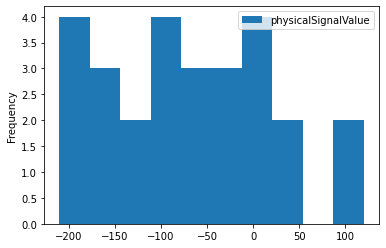

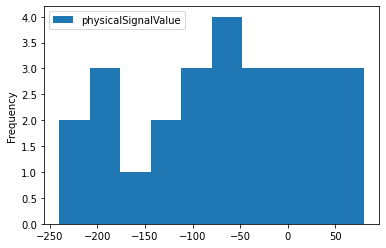

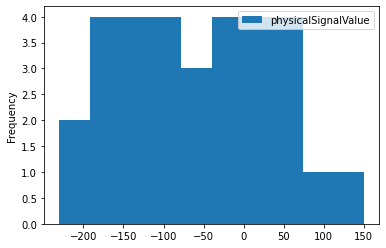

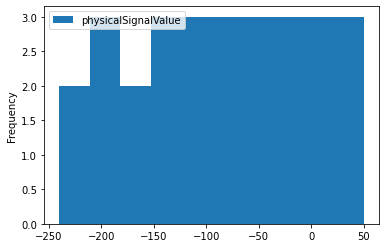

In [26]:
dfH.groupby("position").plot(kind="hist")

In [23]:
dfH.groupby("position").count()

,physicalSignalValue,signal
position,,
HL,27,28
HR,27,28
VL,31,32
VR,28,29


In [45]:
# in order to calculate the covariance matrix, we assume that the signal values on the four positions are mesured at the same time.
dfH = dfH.assign(count = dfH.groupby("position").cumcount())
sample_matrix = dfH.pivot(index='count', columns='position', values='physicalSignalValue').iloc[:27].fillna(axis=0, method='bfill')

In [48]:
sample_matrix

position,HL,HR,VL,VR
count,,,,
0,-40.0,-80.0,40.0,-60.0
1,-50.0,-30.0,-80.0,-80.0
2,-60.0,-60.0,-90.0,-50.0
3,-30.0,-70.0,-50.0,20.0
4,-10.0,-50.0,-60.0,-70.0
5,-20.0,-40.0,50.0,-30.0
6,0.0,-90.0,-70.0,-90.0
7,10.0,-20.0,-40.0,0.0
8,-70.0,-10.0,-20.0,-40.0


In [52]:
cov_matrix = sample_matrix.cov()

position,HL,HR,VL,VR
position,,,,
HL,8433.333333,1688.461538,1553.418803,-358.547009
HR,1688.461538,7900.000000,752.564103,1020.512821
VL,1553.418803,752.564103,7551.566952,2637.749288
VR,-358.547009,1020.512821,2637.749288,7006.267806


<AxesSubplot:xlabel='position', ylabel='position'>

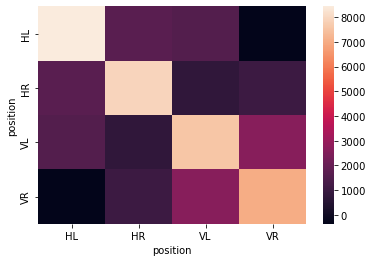

In [51]:
sns.heatmap(cov_matrix)

<AxesSubplot:xlabel='count'>

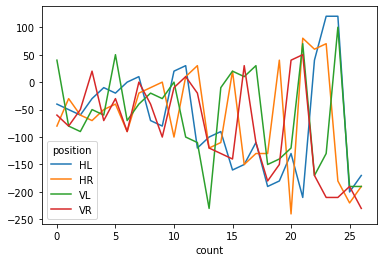

In [53]:
sample_matrix.plot(kind="line")

In [57]:
sample_matrix.describe()

position,HL,HR,VL,VR
count,27.000000,27.000000,27.000000,27.000000
mean,-67.777778,-63.333333,-61.481481,-82.962963
std,91.833182,88.881944,86.899752,83.703452
min,-210.000000,-240.000000,-230.000000,-230.000000
25%,-140.000000,-125.000000,-125.000000,-145.000000
50%,-70.000000,-60.000000,-60.000000,-80.000000
75%,-5.000000,5.000000,5.000000,-15.000000
max,120.000000,80.000000,100.000000,50.000000
